## Campaign Data Exploratory Data Analysis

### Import Packages

In [1]:
import os
import sys
import pandas as pd

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from utils import plot_bar_graph, plot_histogram, plot_pie_chart, get_chat_completion

In [2]:
campaign_df = pd.read_csv("../data/campaign_data.csv")

In [3]:
campaign_df

,campaignid,budget_amount,budget_currencycode,KPI,pricing_model,geo_targeting,vertical,targeting
0,f4p5a01,277.12,USD,Engagement,CPE,NaN,Sports,Opinion Leaders| Investors| Policy Makers| C&I...
1,664kg61,160.76,USD,Engagement,CPE,NaN,Sports,NaN
2,cvpj79c,65.61,USD,Engagement,CPE,NaN,Sports,Opinion Leaders| Investors| Policy Makers| C&I...
3,kk6arx4,1300.00,USD,Engagement,CPE,NaN,Hobbies & Interests,NaN
4,fisff0r,1728.87,USD,Click,CPC,NaN,Automotive,NaN
...,...,...,...,...,...,...,...,...
81,5hvng9w,1826.47,USD,Reach,CPM,NaN,Arts & Entertainment,NaN
82,m1p7fvc,2331.00,USD,Engagement,CPE,NaN,Health & Fitness,25-35| Males (30%) & Females (70%)| LSM 6-16
83,woln7nu,8691.59,USD,Reach,CPM,NaN,Arts & Entertainment,NaN
84,9j2r3sb,1500.00,USD,Click,CPC,NaN,Hobbies & Interests,NaN


In [5]:
campaign_df.columns

Index(['campaignid', 'budget_amount', 'budget_currencycode', 'KPI',
       'pricing_model', 'geo_targeting', 'vertical', 'targeting'],
      dtype='object')

In [13]:
campaign_df.dtypes

campaignid              object
budget_amount          float64
budget_currencycode     object
KPI                     object
pricing_model           object
geo_targeting           object
vertical                object
targeting               object
dtype: object

#### Get all unique values of KPI

In [11]:
unique_kpi_values = campaign_df['KPI'].unique()
print(unique_kpi_values)

['Engagement' 'Click' 'Reach']


- Engagement: Measures user interaction with the ad.
- Click: Counts the number of times users clicked on the ad.
- Reach: Indicates the total number of unique users exposed to the ad.

### Distribution of ad campigns based the KPI type

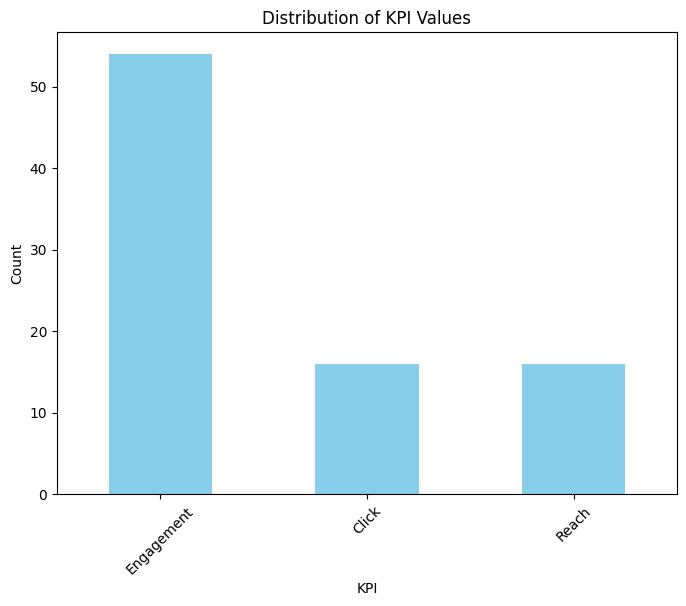

In [5]:
plot_bar_graph(campaign_df, 'KPI')

- The dataset shows different KPI distributions. "Engagement" is most common, indicating <br/>
user interaction focus. "Click" and "Reach" follow with equal occurrences, emphasizing ad <br/>clicks for traffic and broad audience visibility, respectively.

#### Get all unique values of Pricing Model

In [9]:
unique_pricing_model_values = campaign_df['pricing_model'].unique()
print(unique_pricing_model_values)

['CPE' 'CPC' 'CPM']


- **CPE (Cost Per Engagement)**: Advertisers pay based on user engagement with the ad. This could include actions <br/>
such as clicks, interactions, or other predefined engagement metrics.

- **CPC (Cost Per Click)**: Advertisers pay for each click on their ad. This model is based on the number of times <br/>
 users click on the ad, regardless of other engagement metrics.

- **CPM (Cost Per Mille)**: Advertisers pay per thousand impressions of their ad. In this model, advertisers pay a <br/>
fixed amount for every thousand times their ad is shown to users, regardless of clicks or other interactions.



### Distribution of ad campigns based the pricing model

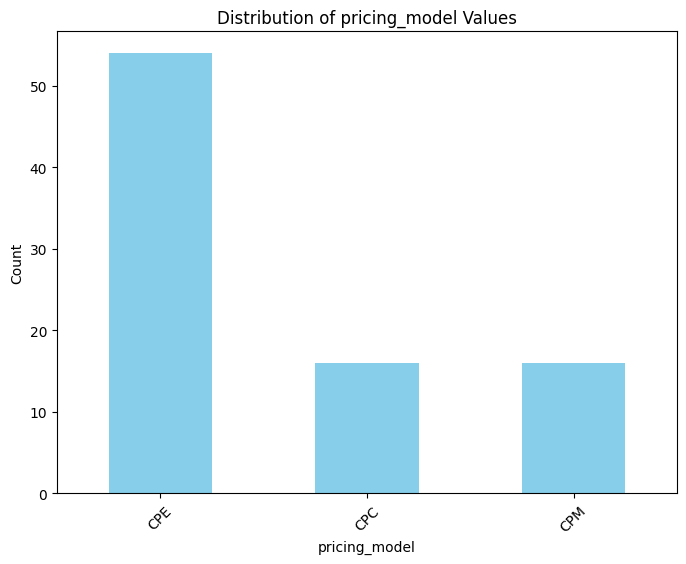

In [6]:
plot_bar_graph(campaign_df, 'pricing_model')

- The dataset presents the distribution of pricing models. "CPE" occurs 54 times, indicating a focus<br/>
on cost per engagement. "CPC" and "CPM" both occur 16 times, suggesting cost per click and<br/>
 cost per mille models, respectively.








#### Get all unique values of budget currency code

In [12]:
unique_budget_currencycode_values = campaign_df['budget_currencycode'].unique()
print(unique_budget_currencycode_values)

['USD']


#### Budget Amount Analysis

In [15]:
import matplotlib.pyplot as plt


# Perform exploratory data analysis
budget_summary = campaign_df['budget_amount'].describe()



# Print summary statistics
print("Summary Statistics for Budget Amounts:")
print(budget_summary)

Summary Statistics for Budget Amounts:
count       86.000000
mean      3585.184884
std       7721.497559
min         65.610000
25%        285.010000
50%       1500.000000
75%       2887.500000
max      55345.000000
Name: budget_amount, dtype: float64


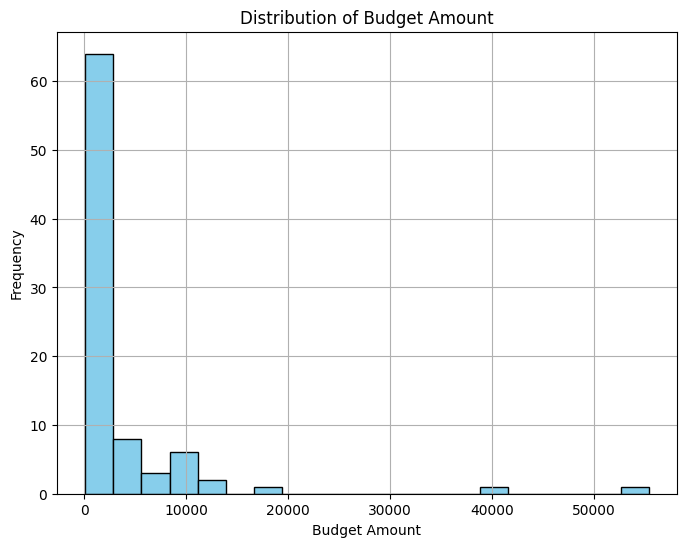

In [7]:
plot_histogram(campaign_df['budget_amount'], 'Budget Amount')

In [5]:
# Calculate the interquartile range (IQR)
Q1 = campaign_df['budget_amount'].quantile(0.25)
Q3 = campaign_df['budget_amount'].quantile(0.75)
IQR = Q3 - Q1

# Adjust the lower bound to ensure it's not negative
lower_bound = max(0, Q1 - 1.5 * IQR)

# Define the upper bound
upper_bound = Q3 + 1.5 * IQR

# Display the range
print("Range where the majority of values reside:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Range where the majority of values reside:
Lower Bound: 0
Upper Bound: 6791.235


In [6]:
# Filter the DataFrame to include only rows where budget amount is within the range
budget_range_df = campaign_df[(campaign_df['budget_amount'] >= lower_bound) & (campaign_df['budget_amount'] <= upper_bound)]

# Count the items within the range
items_in_range_count = len(budget_range_df)

# Compute the percentage in the range relative to the total number of items
percentage_in_range = (items_in_range_count / len(campaign_df)) * 100

# Display the results
print("Items with budget amount within the range:")
print(f"Count: {items_in_range_count}")
print(f"Percentage in range: {percentage_in_range:.2f}%")

Items with budget amount within the range:
Count: 74
Percentage in range: 86.05%


#### Get all unique values of Vertical (Campaign Category)

In [8]:
unique_vertical_values = campaign_df['vertical'].unique()
print(unique_vertical_values)

['Sports' 'Hobbies & Interests' 'Automotive' 'Arts & Entertainment'
 'Food & Drink' 'Health & Fitness' 'Personal Finance'
 'Technology & Computing' 'Home & Garden']


### Distribution of ad campigns based the vertical

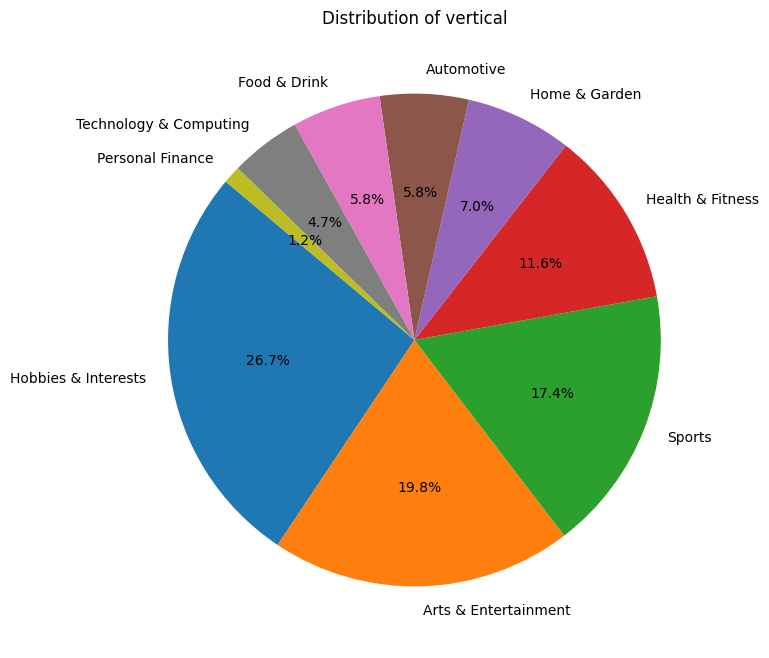

In [6]:
plot_pie_chart(campaign_df['vertical'], 'vertical')

- The dataset showcases diverse campaign verticals. "Hobbies & Interests" leads with 23 occurrences,followed by  <br/>
"Arts & Entertainment" with 17 and "Sports" with 15. Other verticals include "Health & Fitness," "Home & Garden,"  <br/>
 and "Automotive," each appearing with fewer occurrences, reflecting varied themes from personal interests to  <br/>
 lifestyle and leisure activities.

### Geo Targeting Analysis

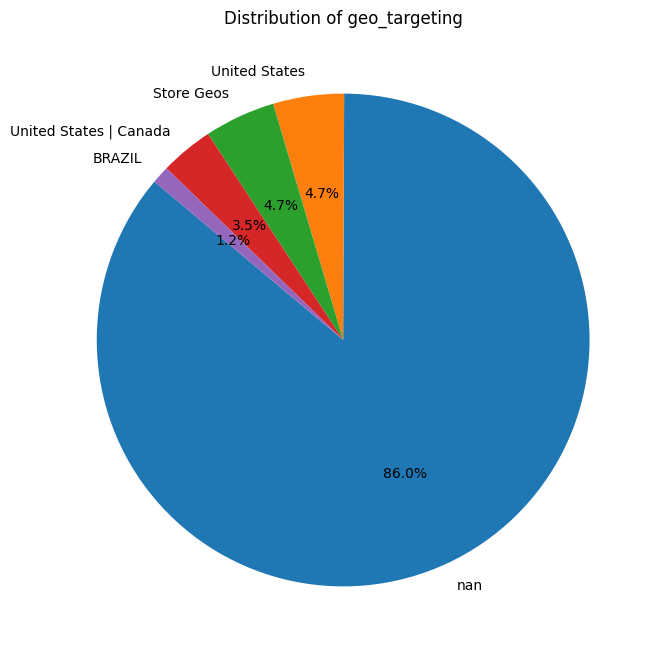

In [5]:
plot_pie_chart(campaign_df['geo_targeting'], 'geo_targeting')

- 'geo_targeting' has 74 NaN values. Notable entries include "United States" and "Store Geos" each 4 times, <br/>
"United States | Canada" 3 times, and "BRAZIL" once.







#### Targeting Analysis

In [10]:
# Count the number of NaN values in the 'targeting' column
nan_count = campaign_df['targeting'].isna().sum()

# Count the number of non-NaN values in the 'targeting' column
non_nan_count = len(campaign_df) - nan_count

print("Number of NaN values in the 'targeting' column:", nan_count)
print("Number of non-NaN values in the 'targeting' column:", non_nan_count)

Number of NaN values in the 'targeting' column: 56
Number of non-NaN values in the 'targeting' column: 30


##### Categories for Targeting column

1. **Age Groups:** Divisions based on the range of ages, typically used for targeting specific demographics.
2. **Gender:** Classification based on biological sex, used to target individuals of a particular gender identity.
3. **Income Bracket:** Categorization based on financial earnings, used for targeting individuals with varying levels of income.
4. **Interests:** Areas of focus or hobbies that individuals are passionate about, utilized for targeting based on personal preferences.
5. **Specific Groups:** Distinct segments of the population with shared characteristics or affiliations, targeted for their unique traits or behaviors.
6. **Contextual Targeting:** Targeting based on the content or context of the environment where ads are displayed, aimed at aligning ads with relevant topics or themes.


In [11]:
campaign_df['targeting'][30]

'MEN AND WOMEN| SOCIAL DEGREE A| 25+ YEARS| INTERESTED IN LUXURY CARS| ELECTRIC CARS| SUSTAINABILITY AND RENEWABLE ENERGIES + ONTEXTUAL– PEOPLE BROWSING THE WEB IN CONTENT RELATED TO ELECTRIC CARS| SUSTAINABILITY| RENEWABLE ENERGY| LUXURY CARS AND BRANDS|INCLUDING RELEVANT KEYWORDS AND COMPETITIVE BRANDS'

In [5]:
text= campaign_df['targeting'][30]
prompt = f'''
Please extract the value corresponding to each of the following categories from the given text in the Targeting column:

Age Groups: Divisions based on the range of ages, typically used for targeting specific demographics.
Gender: Classification based on biological sex, used to target individuals of a particular gender identity.
Income Bracket: Categorization based on financial earnings, used for targeting individuals with varying levels of income.
Interests: Areas of focus or hobbies that individuals are passionate about, utilized for targeting based on personal preferences.
Specific Groups: Distinct segments of the population with shared characteristics or affiliations, targeted for their unique traits or behaviors.
Contextual Targeting: Targeting based on the content or context of the environment where ads are displayed, aimed at aligning ads with relevant topics or themes.
Please provide the extracted value for each category.

the context text that you use to extract the above categories is {text}

if you do not find any relevant related thing from the text for the above category, 
assign a value of nan for the category

return a json of key value pair for each category

'''

In [7]:
response = get_chat_completion(prompt)

2024-03-21 01:39:45,518:logger:chat completion success


In [8]:
response

'{\n  "Age Groups": "25+ YEARS",\n  "Gender": "MEN AND WOMEN",\n  "Income Bracket": "nan",\n  "Interests": "INTERESTED IN LUXURY CARS, ELECTRIC CARS, SUSTAINABILITY AND RENEWABLE ENERGIES",\n  "Specific Groups": "nan",\n  "Contextual Targeting": "PEOPLE BROWSING THE WEB IN CONTENT RELATED TO ELECTRIC CARS, SUSTAINABILITY, RENEWABLE ENERGY, LUXURY CARS AND BRANDS"\n}'